<a href="https://colab.research.google.com/github/Elmir22/Data-science-ML-models-/blob/main/introduction_to_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile('/content/pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2024-04-19 11:05:04--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.203.207, 74.125.142.207, 74.125.197.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.203.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  71.3MB/s    in 1.5s    

2024-04-19 11:05:06 (71.3 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
import os
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f'there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

there are 2 directories and 0 images in pizza_steak
there are 2 directories and 0 images in pizza_steak/train
there are 0 directories and 750 images in pizza_steak/train/pizza
there are 0 directories and 750 images in pizza_steak/train/steak
there are 2 directories and 0 images in pizza_steak/test
there are 0 directories and 250 images in pizza_steak/test/pizza
there are 0 directories and 250 images in pizza_steak/test/steak


In [ ]:
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_images_train

750

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
data_dir

PosixPath('pizza_steak/train')

In [ ]:
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class #pizza_steak /test/pizza
  random_image = random.sample(os.listdir(target_folder),1)
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}')
  return img

Image shape: (384, 512, 3)


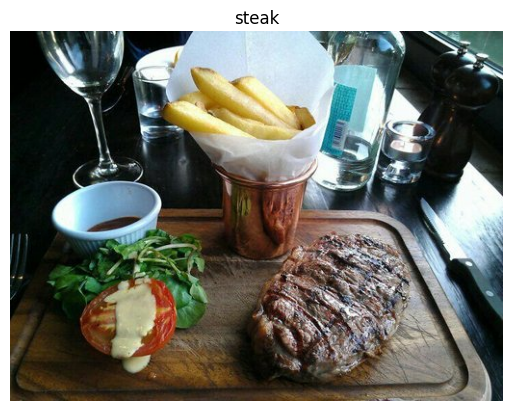

In [ ]:
img = view_random_image(target_dir= 'pizza_steak/train/',
                        target_class= 'steak')

array([[[ 0,  2,  0],
        [ 0,  2,  0],
        [ 0,  2,  0],
        ...,
        [64, 95, 87],
        [67, 97, 89],
        [68, 98, 90]],

       [[ 0,  2,  0],
        [ 0,  2,  0],
        [ 0,  2,  0],
        ...,
        [59, 90, 82],
        [61, 91, 83],
        [62, 92, 84]],

       [[ 0,  2,  0],
        [ 0,  2,  0],
        [ 0,  2,  0],
        ...,
        [57, 88, 80],
        [58, 89, 81],
        [59, 90, 82]],

       ...,

       [[75, 58, 30],
        [73, 56, 28],
        [74, 57, 29],
        ...,
        [42, 57, 62],
        [29, 42, 51],
        [16, 29, 38]],

       [[75, 56, 26],
        [75, 56, 26],
        [76, 56, 29],
        ...,
        [26, 41, 46],
        [32, 45, 54],
        [22, 35, 44]],

       [[84, 65, 35],
        [80, 61, 31],
        [77, 57, 30],
        ...,
        [ 8, 23, 28],
        [32, 45, 54],
        [41, 54, 63]]], dtype=uint8)
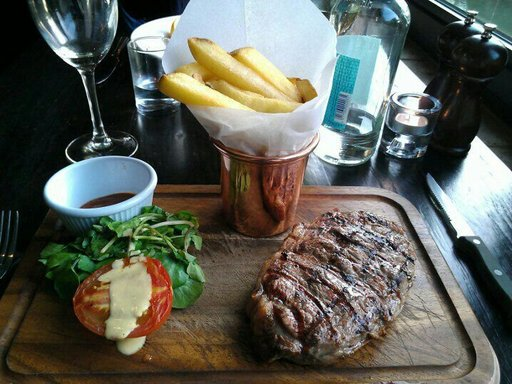

In [ ]:
img

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode = 'binary',
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode = 'binary',
                                               seed=42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation = 'relu',
                           input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10,3, activation= 'relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding = 'valid'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history = model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch= len(train_data),
                      validation_data=valid_data,
                      validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 14s 163ms/step - loss: 0.7093 - accuracy: 0.5287 - val_loss: 0.6764 - val_accuracy: 0.5260
Epoch 2/5
47/47 [==============================] - 6s 118ms/step - loss: 0.5467 - accuracy: 0.7373 - val_loss: 0.3964 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 6s 135ms/step - loss: 0.4657 - accuracy: 0.7940 - val_loss: 0.4147 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 6s 117ms/step - loss: 0.4268 - accuracy: 0.8160 - val_loss: 0.3887 - val_accuracy: 0.8200
Epoch 5/5
47/47 [==============================] - 7s 140ms/step - loss: 0.3857 - accuracy: 0.8340 - val_loss: 0.3540 - val_accuracy: 0.8520


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation= 'relu'),
    tf.keras.layers.Dense(2,activation= 'relu'),
    tf.keras.layers.Dense(1,activation= 'sigmoid')
])
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'])


history = model_2.fit(train_data,
                      epochs=5,
                      steps_per_epoch= len(train_data),
                      validation_data=valid_data,
                      validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 112ms/step - loss: 0.8271 - accuracy: 0.5093 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 6s 124ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 114ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 7s 142ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 113ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation= 'relu'),
    tf.keras.layers.Dense(100,activation= 'relu'),
    tf.keras.layers.Dense(1,activation= 'sigmoid')
])

model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001),
    metrics = ['accuracy'])
history = model_3.fit(train_data,
                      epochs=5,
                      steps_per_epoch =len(train_data),
                      validation_data = valid_data,
                      validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 123ms/step - loss: 0.5671 - accuracy: 0.7007 - val_loss: 0.5357 - val_accuracy: 0.7440
Epoch 2/5
47/47 [==============================] - 5s 109ms/step - loss: 0.4887 - accuracy: 0.7713 - val_loss: 0.4792 - val_accuracy: 0.7580
Epoch 3/5
47/47 [==============================] - 6s 127ms/step - loss: 0.4567 - accuracy: 0.7933 - val_loss: 0.4276 - val_accuracy: 0.8000
Epoch 4/5
47/47 [==============================] - 5s 107ms/step - loss: 0.4325 - accuracy: 0.8107 - val_loss: 0.4147 - val_accuracy: 0.8000
Epoch 5/5
47/47 [==============================] - 6s 124ms/step - loss: 0.4076 - accuracy: 0.8240 - val_loss: 0.4264 - val_accuracy: 0.7980


In [ ]:
len(train_data)

47

Image shape: (512, 512, 3)
Image shape: (384, 512, 3)


array([[[ 5, 14, 13],
        [ 7, 16, 15],
        [ 8, 17, 16],
        ...,
        [42, 42, 34],
        [42, 42, 34],
        [37, 37, 29]],

       [[ 4, 13, 12],
        [ 6, 15, 14],
        [ 7, 16, 15],
        ...,
        [43, 43, 35],
        [48, 48, 40],
        [48, 48, 38]],

       [[ 4, 13, 12],
        [ 5, 14, 13],
        [ 6, 15, 14],
        ...,
        [40, 37, 28],
        [50, 47, 38],
        [55, 53, 41]],

       ...,

       [[64, 32, 17],
        [64, 32, 17],
        [61, 32, 14],
        ...,
        [17, 18, 12],
        [15, 16, 10],
        [11, 12,  6]],

       [[68, 36, 21],
        [68, 36, 21],
        [65, 36, 20],
        ...,
        [14, 15,  9],
        [14, 15,  9],
        [13, 14,  8]],

       [[69, 37, 22],
        [69, 37, 22],
        [66, 37, 21],
        ...,
        [13, 14,  8],
        [16, 17, 11],
        [17, 18, 12]]], dtype=uint8)
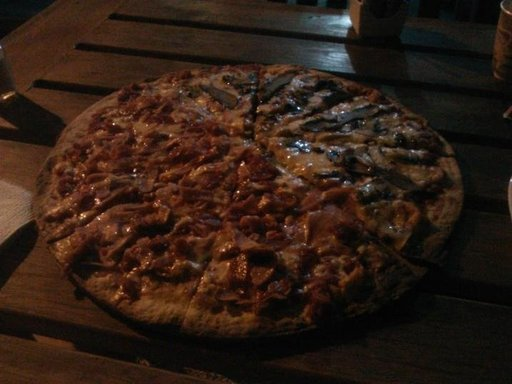

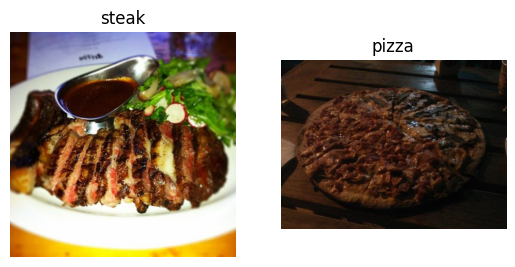

In [ ]:
plt.figure()
plt.subplot(1,2,1)
view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1,2,2)
view_random_image('pizza_steak/train/', 'pizza')

In [ ]:
!nvidia-smi

Fri Apr 19 11:46:25 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0              27W /  70W |   1665MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
train_dir = '/content/pizza_steak/train/'
test_dir = '/content/pizza_steak/test/'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode = 'binary',
                                               seed=42)

test_data = test_datagen.flow_from_directory(test_dir,
                                        batch_size=32,
                                        target_size=(224,224),
                                        class_mode='binary',
                                        seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next()

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           padding = 'valid',
           strides = 1,
           activation = 'relu',
           input_shape = (224,224,3)),
    Conv2D(10,3, activation= 'relu'),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])


model_4.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer = Adam(),
    metrics = ['accuracy'])

history_4 = model_4.fit(train_data,
                      epochs=5,
                      steps_per_epoch= len(train_data),
                      validation_data=valid_data,
                      validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 149ms/step - loss: 0.5343 - accuracy: 0.7247 - val_loss: 0.4097 - val_accuracy: 0.8320
Epoch 2/5
47/47 [==============================] - 6s 118ms/step - loss: 0.4139 - accuracy: 0.8220 - val_loss: 0.4041 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 6s 135ms/step - loss: 0.2252 - accuracy: 0.9193 - val_loss: 0.4073 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 10s 202ms/step - loss: 0.0722 - accuracy: 0.9767 - val_loss: 0.5761 - val_accuracy: 0.8060
Epoch 5/5
47/47 [==============================] - 9s 179ms/step - loss: 0.0241 - accuracy: 0.9927 - val_loss: 1.1666 - val_accuracy: 0.6980


In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 1s 83ms/step - loss: 0.5532 - accuracy: 0.7740


[0.5531546473503113, 0.7739999890327454]

In [ ]:
model_4.evaluate(test_data)

16/16 [==============================] - 1s 82ms/step - loss: 0.4759 - accuracy: 0.7780


[0.47587528824806213, 0.777999997138977]

In [ ]:
history_4.history

{'loss': [0.5343395471572876,
  0.4139098823070526,
  0.22523804008960724,
  0.07223880290985107,
  0.024107931181788445],
 'accuracy': [0.7246666550636292,
  0.8220000267028809,
  0.9193333387374878,
  0.9766666889190674,
  0.9926666617393494],
 'val_loss': [0.4097454249858856,
  0.4040992558002472,
  0.40732666850090027,
  0.5761473178863525,
  1.1666334867477417],
 'val_accuracy': [0.8320000171661377,
  0.8360000252723694,
  0.8339999914169312,
  0.8059999942779541,
  0.6980000138282776]}

<Axes: >

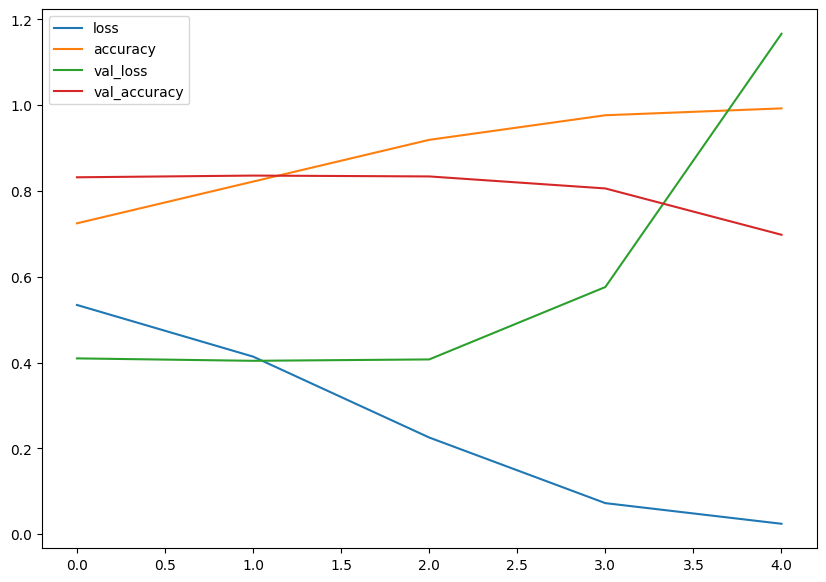

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize = (10,7))

In [ ]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['loss']))
  #plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label = 'val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  #plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

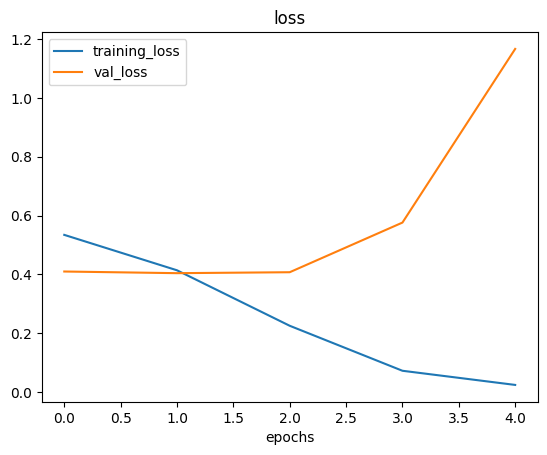

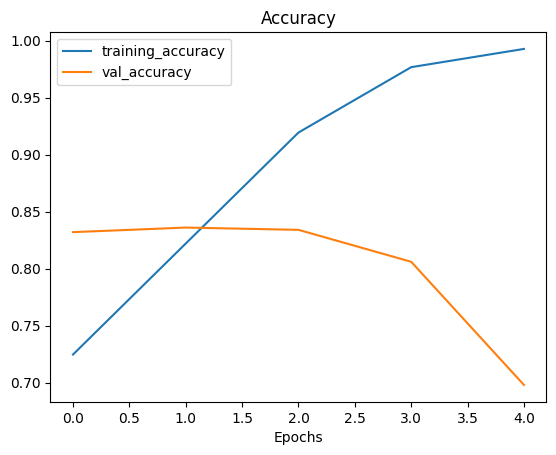

In [ ]:
plot_loss_curves(history_4)